<a href="https://colab.research.google.com/github/lucaskmiyazaki/corona/blob/master/website.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# initialization
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
class PeopleDistribution:
  def __init__(self):
    self.df = pd.read_csv("/content/drive/My Drive/carreira/hackaton/data/super_horarios3.csv") # info about supermarkets
    self.paths = pd.read_csv("/content/drive/My Drive/carreira/hackaton/data/mapas/relacao_arquivo.csv") # paths to access maps
    self.legend = []
    self.places = []
    self.rec = []
    
  def getMap(self, name, hour, day):
     # get max and min coordinates for each district
    districts = {'butanta', 'morumbi', 'raposo tavares', 'rio pequeno', 'vila sonia', 'alto de pinheiros', 'itaim bibi', 
                'jardim paulista', 'pinheiros', 'barra funda', 'jaguara', 'jaguare', 'lapa', 'perdizes', 'vila leopoldina'}
    borders = pd.DataFrame(index= districts, columns= {'max_lat', 'max_lng', 'min_lat', 'min_lng'})
    for d in districts:
      borders['max_lat'][d] = max(self.df[self.df.district == d].lat) + 0.01
      borders['max_lng'][d] = max(self.df[self.df.district == d].lon) + 0.01
      borders['min_lat'][d] = min(self.df[self.df.district == d].lat) - 0.01
      borders['min_lng'][d] = min(self.df[self.df.district == d].lon) - 0.01

    # preparing matplot.lib
    rng = default_rng()
    ruh_m = plt.imread(self.paths[self.paths.district == name].path.values[0])
    BBox = (borders.min_lng[name], borders.max_lng[name], 
            borders.min_lat[name], borders.max_lat[name])
    s = len(self.df[self.df.district == name])
    c = [] #rng.choice(s, size=s, replace=False)
    t = np.arange(0, s, 1)
    fig, ax = plt.subplots(figsize = (8,7))
    pop = self.df[self.df.district == name]["pop_time_"+day+"_"+hour].to_numpy()
    for i in pop:
      if i <=30:
        c.append('g')
      elif i >=70:
        c.append('r')
      else:
        c.append('b')

    # positioning points and labels on the map
    ax.scatter(self.df[self.df.district == name].lon, self.df[self.df.district == name].lat, zorder=1, alpha= 0.7, c=c, s=10*self.df[self.df.district == name]["pop_time_"+day+"_"+hour])
    for i, txt in enumerate(t):
      ax.annotate(txt, xy = (self.df[self.df.district == name].lon[self.df[self.df.district == name].index[i]], self.df[self.df.district == name].lat[self.df[self.df.district == name].index[i]]))

    # final settings
    ax.set_title('volume de pessoas em supermercados')
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

    return fig

  def getLegend(self, name):
    # legend for the labels
    self.legend = []
    for i in range(len(self.df[self.df.district == name])):
      self.legend.append(str(i)+ ": "+ self.df.name[self.df[self.df.district == name].index[i]])
    return self.legend

  def bestPlaces(self, district):
    # cria uma lista de melhores lugares para ir comprar
    self.places = []
    days = {"Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"}
    for day in days:
      for hour in range(24):
        for id in self.df[self.df.district == district].id:
          pop = self.df[self.df.id == id]["pop_time_"+day+"_"+str(hour)].item()
          if(pop != 0):
            place = []
            place.append(self.df[self.df.id == id].name.item())
            place.append(hour)
            place.append(day)
            place.append(pop)
            place.append(id)
            self.places.append(place)
            for i in range(len(self.places)-1):
              if (self.places[-1][3] < self.places[i][3]):
                self.places = self.places[:i] + [self.places[-1]] + self.places[i:-1]
                break
    return self.places


  def add2Q(self, district, username, choice):
    # adiciona a pessoa a fila da opção escolhida
    print("o")

  def recommendations(self, from_hour, to_hour, chosen_day):
    # a partir das preferencias do cliente indicar as próximas 3 opções
    self.rec = []
    for i in range(len(self.places)):
      hour = self.places[i][1]
      day = self.places[i][2]
      if (int(hour) >= int(from_hour) and int(hour) <= int(to_hour) and day == chosen_day):
        self.rec.append(self.places[i])
      if (len(rec) > 5):
        break
    return self.rec

  def getAddress(self, id):
    return self.df[self.df.id == id].address.item()




['0: Pão de Açúcar',
 '1: DIA Supermercado',
 '2: Pão de Açúcar',
 '3: Luzita Indústria e Comércio',
 '4: DIA Supermercado',
 '5: Mercado Municipal de Pinheiros',
 '6: Pomar da Vila',
 '7: Mambo Supermarket - Vila Madalena',
 '8: Hirota Food Supermarket',
 '9: MERCADO NATURAL',
 '10: Mini Mercado Extra',
 '11: Quitanda',
 '12: Cerealista A Granel',
 '13: Pão de Açúcar',
 '14: Carrefour Express Fradique Coutinho',
 '15: Minuto Pão de Açúcar Pinheiros',
 '16: Supermercado Padrão',
 '17: Dia Market',
 '18: Solli Orgânicos',
 '19: DIA Supermercado']

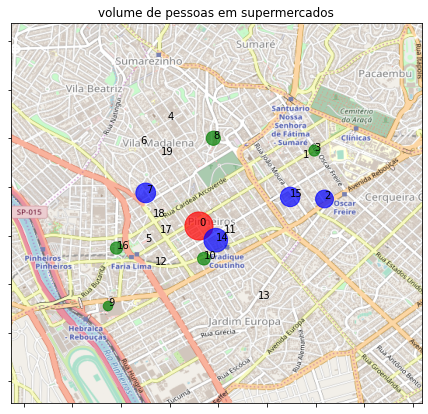

In [0]:
map = PeopleDistribution()
map.getMap("pinheiros", "21", "Saturday")
map.getLegend("pinheiros")
#map.df[map.df.district == "pinheiros"]["pop_time_Monday_13"].to_numpy()


In [0]:
!pip install flask-ngrok

In [0]:
import io
import random
from flask import Flask, Response, request, render_template, url_for
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.backends.backend_svg import FigureCanvasSVG
from flask_ngrok import run_with_ngrok
from matplotlib.figure import Figure

app = Flask(__name__)
run_with_ngrok(app)   #starts ngrok when the app is run
map = PeopleDistribution()
legend = ["o"]
rec = []

@app.route("/")
@app.route("/home")
def index():
    """ Returns html with the img tag for your plot.
    """
    district = str(request.args.get("district", "pinheiros"))
    hour = str(request.args.get("hour", "13"))
    day = str(request.args.get("day", "Monday"))
    # in a real app you probably want to use a flask template.
    return f"""
    <!DOCTYPE html>
    <html>

    <head>
    <h1>EvitCovid</h1>
    <h2>Evite multidões para conter o COVID-19 </h2>
    </head>

    <body>
    <p><a href="/recommendations">pedir recomendações de locais de compra</a></p>
    <h5>digite o distrito onde você mora, o horário e o dia da semana:</h5>
    <form method=get action="/">
      <input name="district" type=string value="{district}" />
      <input name="hour" type=string value="{hour}" />
      <input name="day" type=string value="{day}" />
      <input type=submit value="buscar">
    </form>
    
    <img src="/matplot/{district}/{hour}/{day}"
         alt="random points as png"
         height="700"
    >
    {show_labels(district)}
    </body>

    </html>
    """
    # from flask import render_template
    # return render_template("yourtemplate.html", num_x_points=num_x_points)


@app.route("/matplot/<district>/<hour>/<day>")
def plot_png(district = "pinheiros", hour = "13", day = "Monday"):
    """ renders the plot on the fly.
    """
    fig = map.getMap(district, hour, day)
    #legend = map.getLegend()
    #fig = generateMap(district, hour, day)

    output = io.BytesIO()
    FigureCanvasAgg(fig).print_png(output)
    return Response(output.getvalue(), mimetype="image/png")

@app.route("/recommendations")
def search_recommendations():
  district = str(request.args.get("district", "pinheiros"))
  from_hour = str(request.args.get("from_hour", "10"))
  to_hour = str(request.args.get("to_hour", "12"))
  day = str(request.args.get("day", "Monday"))
  #rec = calc_recommendations(district, from_hour, to_hour, day)
  return f"""
  <!DOCTYPE html>
    <html>

    <head>
    <h1>EvitCovid</h1>
    <h2>Recomendação de locais de compra </h2>
    </head>

    <body>
    <form method=get action="/recommendations">
      <input name="district" type=string value="{district}" />
      <input name="from_hour" type=string value="{from_hour}" />
      <input name="to_hour" type=string value="{to_hour}" />
      <input name="day" type=string value="{day}" />
      <input type=submit value="buscar">
    </form>
    
    {calc_recommendations(district, from_hour, to_hour, day)}
    {show_recommendation(0)}
    {show_recommendation(1)}
    {show_recommendation(2)}
    {show_recommendation(3)}

    <p><a href="/home">voltar</a></p>
    </body>

    </html>
  """


@app.route("/option1")
def option1():
  return """
  <h1> Cupom de Desconto </h1>
  <h4> Compareça ao local no horário indicado e ganhe 10% de desconto em sua próxima compra </h4>
  <p><a href="/recommendations">voltar</a></p>
  <p><a href="/home">pagina inicial</a></p>
  """

def show_labels(name):
  legend = map.getLegend(name)
  string = ""
  for i in range(len(legend)):
    string = string + "<h4>" + legend[i] + "</h4>"
  return string

def calc_recommendations(district, from_hour, to_hour, day):
  map.bestPlaces(district)
  #print(from_hour, to_hour, day)
  map.recommendations(from_hour, to_hour, day)
  print("rec:", map.rec)
  #return rec
  #string = ""
  #for i in range(len(rec)):
    #string = string + "<h4>" + rec[i][0] + ": " + rec[i][2] + " as " + str(rec[i][1]) + "</h4>"
  #return string

def show_recommendation(i):
  string = "<h4>" + map.rec[i][0] + ": " + "</h4>" + map.rec[i][2] + " as " + str(map.rec[i][1]) + "  -  "  + map.getAddress(map.rec[0][4])
  if int(map.rec[i][3]) < 20: 
    string = string + "<p><a href='/option1'>" + "DESCONTO!!" + "</a></p>"
  return string

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://cf686384.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [04/Apr/2020 17:05:49] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2020 17:05:50] "GET /matplot/pinheiros/13/Monday HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2020 17:05:51] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [04/Apr/2020 18:13:50] "GET / HTTP/1.1" 200 -
